# **PowerCo Customer Churn Analysis**

*This notebook explores the factors influencing PowerCo's customer churn, aiming to identify drivers behind clients switching service providers.*

*Prepared by : Faris Arief Mawardi*

## **I. Introduction**

**Objective :** 

The primary objective of this project is to conduct a thorough analysis of historical customer data, pricing information, and churn indicators to uncover patterns and variables contributing significantly to customer churn. The aim is to build a predictive model that can forecast the likelihood of churn for each customer based on factors like price sensitivity and historical usage patterns

**Project Background :**

PowerCo is a major gas and electricity utility provider facing a notable increase in customer churn, particularly in the Small & Medium Enterprise (SME) segment. The liberalization of the energy market in Europe has intensified competition, prompting clients to switch to alternative service providers. To address this challenge, PowerCo has partnered with BCG to analyze and identify the key factors leading to customer churn.

**Problem Statement :**

The problem revolves around understanding the drivers and underlying reasons behind the customer churn experienced by PowerCo. The main objective is to identify and explore the factors influencing customers to switch from PowerCo to other service providers, particularly in the SME segment.

# II. Data Loading

In [2]:
import pandas as pd

client = pd.read_csv("client_data.csv")
price = pd.read_csv("price_data.csv")

# IV. Exploratory Data Analysis 

**4.1 Initial Dataset Understanding**

*In this section, we will conduct an initial exploration of the dataset to obtain information and a preliminary understanding of the features and data contained within.*

**Displaying the client dataframe**

In [3]:
client

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,2012-05-24,2016-05-08,2015-05-08,2014-05-26,4648.01,...,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
14602,d0a6f71671571ed83b2645d23af6de00,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,2012-08-27,2016-08-27,2012-08-27,2015-08-28,631.69,...,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
14603,10e6828ddd62cbcf687cb74928c4c2d2,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,2012-02-08,2016-02-07,2012-02-08,2015-02-09,190.39,...,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
14604,1cf20fd6206d7678d5bcafd28c53b4db,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,2012-08-30,2016-08-30,2012-08-30,2015-08-31,19.34,...,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0


**Insight :**

1. **Customer Usage Data:**
   - **cons_12m (Consumption Last 12 Months):** Analyze the distribution of this variable to identify customer segments based on their historical energy consumption. High or low consumption levels might relate to churn behavior.
   - **cons_gas_12m (Gas Consumption Last 12 Months):** Explore the gas consumption pattern, if available, to understand the usage trend among customers.

2. **Pricing Information:**
   - **margin_gross_pow_ele (Gross Margin on Power):** Investigate the distribution of gross margins to understand the profitability per unit of electricity provided. Higher margins might be associated with customer satisfaction and lower churn.
   - **price sensitivity:** Calculate or derive a metric for price sensitivity using pricing data and historical churn to see if there's a correlation between prices and customer churn.

3. **Churn Indicators:**
   - **churn (Churn Indicator):** Calculate the overall churn rate and investigate how it varies concerning different customer segments, usage patterns, or pricing groups.
   - **churn vs. historical usage:** Compare churn rates with historical usage patterns to identify if there's any correlation between high/low usage and churn likelihood.

4. **Customer Tenure and Contracts:**
   - **num_years_antig (Number of Years Customer Has Been Antiquity):** Explore the relationship between customer tenure and churn. Longer-tenured customers might be less likely to churn.
   - **date_activ, date_end, date_modif_prod, date_renewal:** Analyze these dates to understand customer lifecycle events and their potential impact on churn.

5. **Categorical Variables:**
   - **channel_sales, origin_up:** Explore categorical variables to understand how different sales channels or geographical origins influence churn behavior.

6. **Correlation and Feature Importance:**
   - **Correlation Analysis:** Check for correlations between variables and churn. Identify which variables have the most significant impact on churn through correlation matrices or feature importance techniques.

7. **Missing Values and Data Quality:**
   - Check for missing values or inconsistencies in the data and plan for data cleaning if required.

These insights are preliminary and would require deeper analysis and visualization to draw more concrete conclusions about factors contributing to customer churn in PowerCo's dataset.

**Dipslaying the price dataframe**

In [4]:
price

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.00000,0.000000
...,...,...,...,...,...,...,...,...
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


**Insight :**

The dataset provided contains information related to price variations over different periods. Here are some insights derived from the dataset:

1. **Price Fluctuations Over Time:**
   - The dataset covers price variations across different months (price_date column) for different customers (id column).
   - Prices seem to be segmented into off-peak, peak, and mid-peak categories (price_off_peak_var, price_peak_var, price_mid_peak_var).
   - Fixed prices for these categories are also provided (price_off_peak_fix, price_peak_fix, price_mid_peak_fix).

2. **Uniformity in Fixed Prices:**
   - Fixed prices appear consistent across the time periods for each customer. There is no visible change in fixed prices over the months.

3. **Variations in Variable Prices:**
   - Variable prices vary slightly across different months for some customers. There are fluctuations in variable prices for different peak categories.

4. **Potential Trends or Seasonality:**
   - Explore whether there's a pattern in price variations across months for different customer segments.
   - Determine if specific months or seasons correlate with price changes, especially in variable pricing.

5. **Identifying Price Sensitivity:**
   - Assess whether customers exhibit any reaction or churn behavior corresponding to these price variations.
   - Derive metrics or calculations to evaluate price sensitivity based on these price variations and their relationship with churn data (if available).

6. **Analyzing Price Changes Impact:**
   - Investigate if price fluctuations coincide with any significant changes in customer behavior, such as increased churn rates during periods of price changes.

7. **Data Cleaning and Integrity Check:**
   - Verify data consistency and quality to ensure there are no missing or incorrect values affecting the analysis.

These insights will aid in understanding how price variations occur over time and their potential influence on customer behavior, especially in terms of churn. Further analysis integrating this dataset with churn indicators or other customer data could reveal deeper insights into the relationship between prices and churn behavior.

**4.2 Merging the Datasets**

In [5]:
# Merge the datasets on the 'id' column using an 'outer' merge
data = pd.merge(client, price, on='id', how='outer')

# Display the shapes to check the number of rows in each dataset before and after merging
print("Shape of data 1:", client.shape)
print("Shape of data 2:", price.shape)
print("Shape of merged data:", data.shape)

Shape of data 1: (14606, 26)
Shape of data 2: (193002, 8)
Shape of merged data: (193002, 33)


In [6]:
data

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.0,54946.0,0.0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1.0,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192997,4ce4a572d6a97185f50d70e5cdc4129a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2015-08-01,0.104531,0.094642,0.071661,58.936780,36.344721,8.334263
192998,4ce4a572d6a97185f50d70e5cdc4129a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2015-09-01,0.100262,0.090362,0.067368,58.936780,36.344721,8.334263
192999,4ce4a572d6a97185f50d70e5cdc4129a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2015-10-01,0.100262,0.090362,0.067368,58.936780,36.344721,8.334263
193000,4ce4a572d6a97185f50d70e5cdc4129a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2015-11-01,0.098414,0.089947,0.066059,59.173468,36.490689,8.367731


**Insight :**

The datasets have been effectively merged.

**4.3 Checking the Summary of the Datasets**

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              193002 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  float64
 3   cons_gas_12m                    175149 non-null  float64
 4   cons_last_month                 175149 non-null  float64
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  float64
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

**Insight :**

1. **Data Completeness:**
   - There are a total of 193,002 entries in this dataset.
   - Several columns exhibit missing values, notably in the 'channel_sales' and other features related to consumption, forecasts, margins, and origin details.
2. **Data Types:**
   - The dataset primarily consists of two data types: float64 and object.
   - Float64 columns seem to represent numerical values, including consumption, forecasts, margins, and pricing variables.
   - Object columns likely contain categorical or string data, such as 'id', 'channel_sales', and various date-related columns ('date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'origin_up', 'price_date').
3. **Feature Summary:**
   - There are 33 columns in the dataset, including features related to customer IDs, sales channels, consumption metrics, dates (activation, modification, renewal), forecasts (consumption, discounts, meter rent), pricing variables, gas usage, margins, product counts, origin details, maximum power, and churn indicator.
4. **Churn Column:**
   - The 'churn' column seems to indicate whether a customer churned or not. This feature will be plotted as the target variable for this customer curn forecasting model. It contains float64 values, suggesting it might have some missing or incorrect entries.
5. **Pricing Information:**
   - Pricing-related columns ('price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix') have complete data with 193,002 non-null entries.
   - These columns are likely associated with different pricing variations.
6. **Temporal Data:**
   - Several columns (like 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'price_date') are in object format, suggesting they contain date-related information. Conversion to date-time format might be beneficial for temporal analysis.
7. **Gas Usage and Origin Details:**
   - The 'has_gas' column indicates whether a customer has gas, while 'origin_up' likely refers to the origin of the customer's subscription.
8. **Statistical Summary:**
   - The dataset's memory usage is relatively substantial, around 48.6+ MB, which might increase after further processing or manipulation.
   
To perform a comprehensive analysis, additional steps might include :
- handling missing values
- converting date columns to proper date-time format
- encoding categorical variables
- checking data distributions
- further exploratory data analysis to unveil patterns, correlations, and potential predictors of churn.

**4.4 Checking for Duplicate Entries**

*In this section, we will perform a check for duplicate entries present in this dataset.*

In [7]:
# Counting the number of rows that are duplicates
duplicate_rows_count = data.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows_count}")

Number of duplicate rows: 0


**Insight:**

There are no duplicate entries in the dataset. Next, we will proceed to check the missing values in the dataset.

**4.5 Missing Values Analysis**

*After conducting an initial check on the dataset, it has been identified that there are missing values present in several columns. In this section, we will delve deeper into the quantity, information, and patterns of the missing values within this dataset.*

In [8]:
missing = data.isnull().sum() # Initializing the 'missing' variable to calculate the total number of missing values in the dataset
missing_percentage = (data.isnull().sum() / len(data)) * 100 # Initializing the percentage of missing values in the dataset
info_missing = pd.DataFrame({'Number of Missing Values': missing, 'Percentage of Missing Values': missing_percentage}) # Initializing a variable to display the number of missing values along with their percentages per feature in the dataset
info_missing # Displaying the result of missing values calculation in a da

,Number of Missing Values,Percentage of Missing Values
id,0,0.000000
channel_sales,17853,9.250163
cons_12m,17853,9.250163
cons_gas_12m,17853,9.250163
cons_last_month,17853,9.250163
date_activ,17853,9.250163
date_end,17853,9.250163
date_modif_prod,17853,9.250163
date_renewal,17853,9.250163
forecast_cons_12m,17853,9.250163


**Insight :**

This table provides the number of missing values and the corresponding percentage of missing values for each column in the dataset. Here's an analysis based on this information:

1. **Missing Values Overview:**
   - The columns have missing values ranging from 0 to 9.25% of the total dataset.
   - Several columns have missing values, including :
        - 'channel_sales' 
        - 'cons_12m' 
        - 'cons_gas_12m'
        - 'cons_last_month'
        - 'date_activ'
        - 'date_end'
        - 'date_modif_prod'
        - 'date_renewal'
        - 'forecast_cons_12m'
        - 'forecast_cons_year'
        - 'forecast_discount_energy'
        - 'forecast_meter_rent_12m'
        - 'forecast_price_energy_off_peak'
        - 'forecast_price_energy_peak'
        - 'forecast_price_pow_off_peak'
        - 'has_gas'
        - 'imp_cons'
        - 'margin_gross_pow_ele'
        - 'margin_net_pow_ele'
        - 'nb_prod_act'
        - 'net_margin'
        - 'num_years_antig'
        - 'origin_up'
        
   - Columns related to pricing and churn ('price_date', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix') have no missing values.

2. **Impact of Missing Data:**
   - Missing data can affect analysis and modeling, especially in columns with a high percentage of missing values. Strategies like imputation or deletion might be necessary to handle this missing data depending on the analysis goals.
   - Columns related to key customer metrics ('cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'forecast_cons_year', 'imp_cons') have missing values, which might impact the accuracy of consumption-related analysis or predictive modeling.

3. **Categorical Data and Dates:**
   - Columns like 'channel_sales', 'has_gas', 'origin_up' are categorical, and missing values in these columns might require careful handling during encoding or analysis.
   - Date-related columns ('date_activ', 'date_end', 'date_modif_prod', 'date_renewal') have missing values, which could impact any temporal analysis or feature engineering based on these dates.

4. **Churn Column:**
   - The 'churn' column, indicating churn or non-churn, also has missing values. Handling missing values in this column is crucial for any churn prediction analysis.

5. **Missing Values Handling Strategy:**
   - Given the dataset's attribute-wise missing values, totaling less than 9% across the board, a decision has been made to adopt a pragmatic approach: deletion of rows containing any missing values. This strategy aims to maintain data integrity by preserving the majority of the dataset while mitigating the impact of missing information on subsequent analyses or models. While this action ensures a cleaner dataset, it's crucial to recognize its trade-off—loss of information—that might influence the representativeness and depth of the final analysis or model. Thus, this selective approach addresses missing data while considering the potential implications of reducing the dataset size.

**4.6 Data Distribution Analysis**

In [9]:
# Displaying Descriptive Statistical Analysis of Numerical Columns in the Dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
cons_12m,175149.0,159260.578525,573541.331047,0.0,5674.000000,14115.000000,40763.000000,6.207104e+06
cons_gas_12m,175149.0,28080.717829,162940.034053,0.0,0.000000,0.000000,0.000000,4.154590e+06
cons_last_month,175149.0,16095.518404,64376.741908,0.0,0.000000,792.000000,3383.000000,7.712030e+05
forecast_cons_12m,175149.0,1868.343884,2387.560169,0.0,494.980000,1112.610000,2400.350000,8.290283e+04
forecast_cons_year,175149.0,1399.782380,3248.331276,0.0,0.000000,314.000000,1745.000000,1.753750e+05
forecast_discount_energy,175149.0,0.967028,5.109025,0.0,0.000000,0.000000,0.000000,3.000000e+01
forecast_meter_rent_12m,175149.0,63.074649,66.143996,0.0,16.180000,18.790000,131.030000,5.993100e+02
forecast_price_energy_off_peak,175149.0,0.137287,0.024625,0.0,0.116340,0.143166,0.146348,2.739630e-01
forecast_price_energy_peak,175149.0,0.050487,0.049036,0.0,0.000000,0.084138,0.098837,1.959750e-01
forecast_price_pow_off_peak,175149.0,43.130229,4.486779,0.0,40.606701,44.311378,44.311378,5.926638e+01


In [10]:
import numpy as np

# Filter columns to be analyzed -> numerical features 
numeric_features = data.select_dtypes(include=np.number)
# Calculate skewness and kurtosis for numerical columns
skewness = numeric_features.skew()
kurtosis = numeric_features.kurtosis()

# Create a DataFrame 'summary' containing skewness and kurtosis values for each numeric column
skewkurt = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

skewkurt

,Skewness,Kurtosis
cons_12m,5.996313,42.669832
cons_gas_12m,9.601588,126.427130
cons_last_month,6.389957,47.732548
forecast_cons_12m,7.159049,147.470752
forecast_cons_year,16.587522,653.463987
forecast_discount_energy,5.153648,24.836366
forecast_meter_rent_12m,1.503670,4.483410
forecast_price_energy_off_peak,-0.120054,8.363671
forecast_price_energy_peak,-0.014138,-1.890489
forecast_price_pow_off_peak,-4.999296,54.681957


**Insight :**

1. **Consumption Patterns:**
   - **cons_12m:** Average annual consumption is high at approximately 159,260 kWh with a standard deviation of 573,541 kWh. There's a wide range from a minimum of 0 kWh to a maximum of 6.21 million kWh.
   - **cons_gas_12m:** The mean consumption for gas over 12 months is around 28,081 kWh, with significant variability, ranging from 0 kWh to 4.15 million kWh.
   - **cons_last_month:** The average consumption in the last month is 16,096 kWh, with a standard deviation of 64,376 kWh. The range spans from 0 kWh to 771,203 kWh.

2. **Forecasted Consumption and Pricing:**
   - **forecast_cons_12m:** The predicted annual consumption averages around 1,868 kWh, with considerable variation, ranging from 0 kWh to 82,903 kWh.
   - **forecast_price_energy_off_peak:** The forecasted price for energy during off-peak hours averages at 0.137, with a small standard deviation of 0.024, and ranges between 0 and 0.273.
   - **forecast_price_energy_peak:** The average forecasted price for energy during peak hours is 0.050, varying between 0 and 0.196.

3. **Other Metrics:**
   - **net_margin:** The net margin ranges from 0 to 24,571 euros, with an average of 189 euros and a standard deviation of 312 euros.
   - **pow_max:** The maximum power has an average of 18.13 kW, ranging from 3.3 kW to 320 kW.
   - **churn:** The churn rate averages at 9.7%, varying between 0% and 100%.

4. **Skewness and Kurtosis:**
   - Many features exhibit significant skewness and kurtosis, indicating potential departures from normal distributions:
     - Features like **cons_gas_12m**, **forecast_cons_12m**, **forecast_cons_year**, **imp_cons**, **net_margin**, and **nb_prod_act** show high skewness and kurtosis, suggesting non-normal distributions and potential outliers.

These statistics provide an understanding of the central tendencies, variations, and distribution shapes of different attributes within the dataset. The presence of outliers and non-normal distributions in certain features could impact modeling or analysis and might need further investigation or preprocessing.

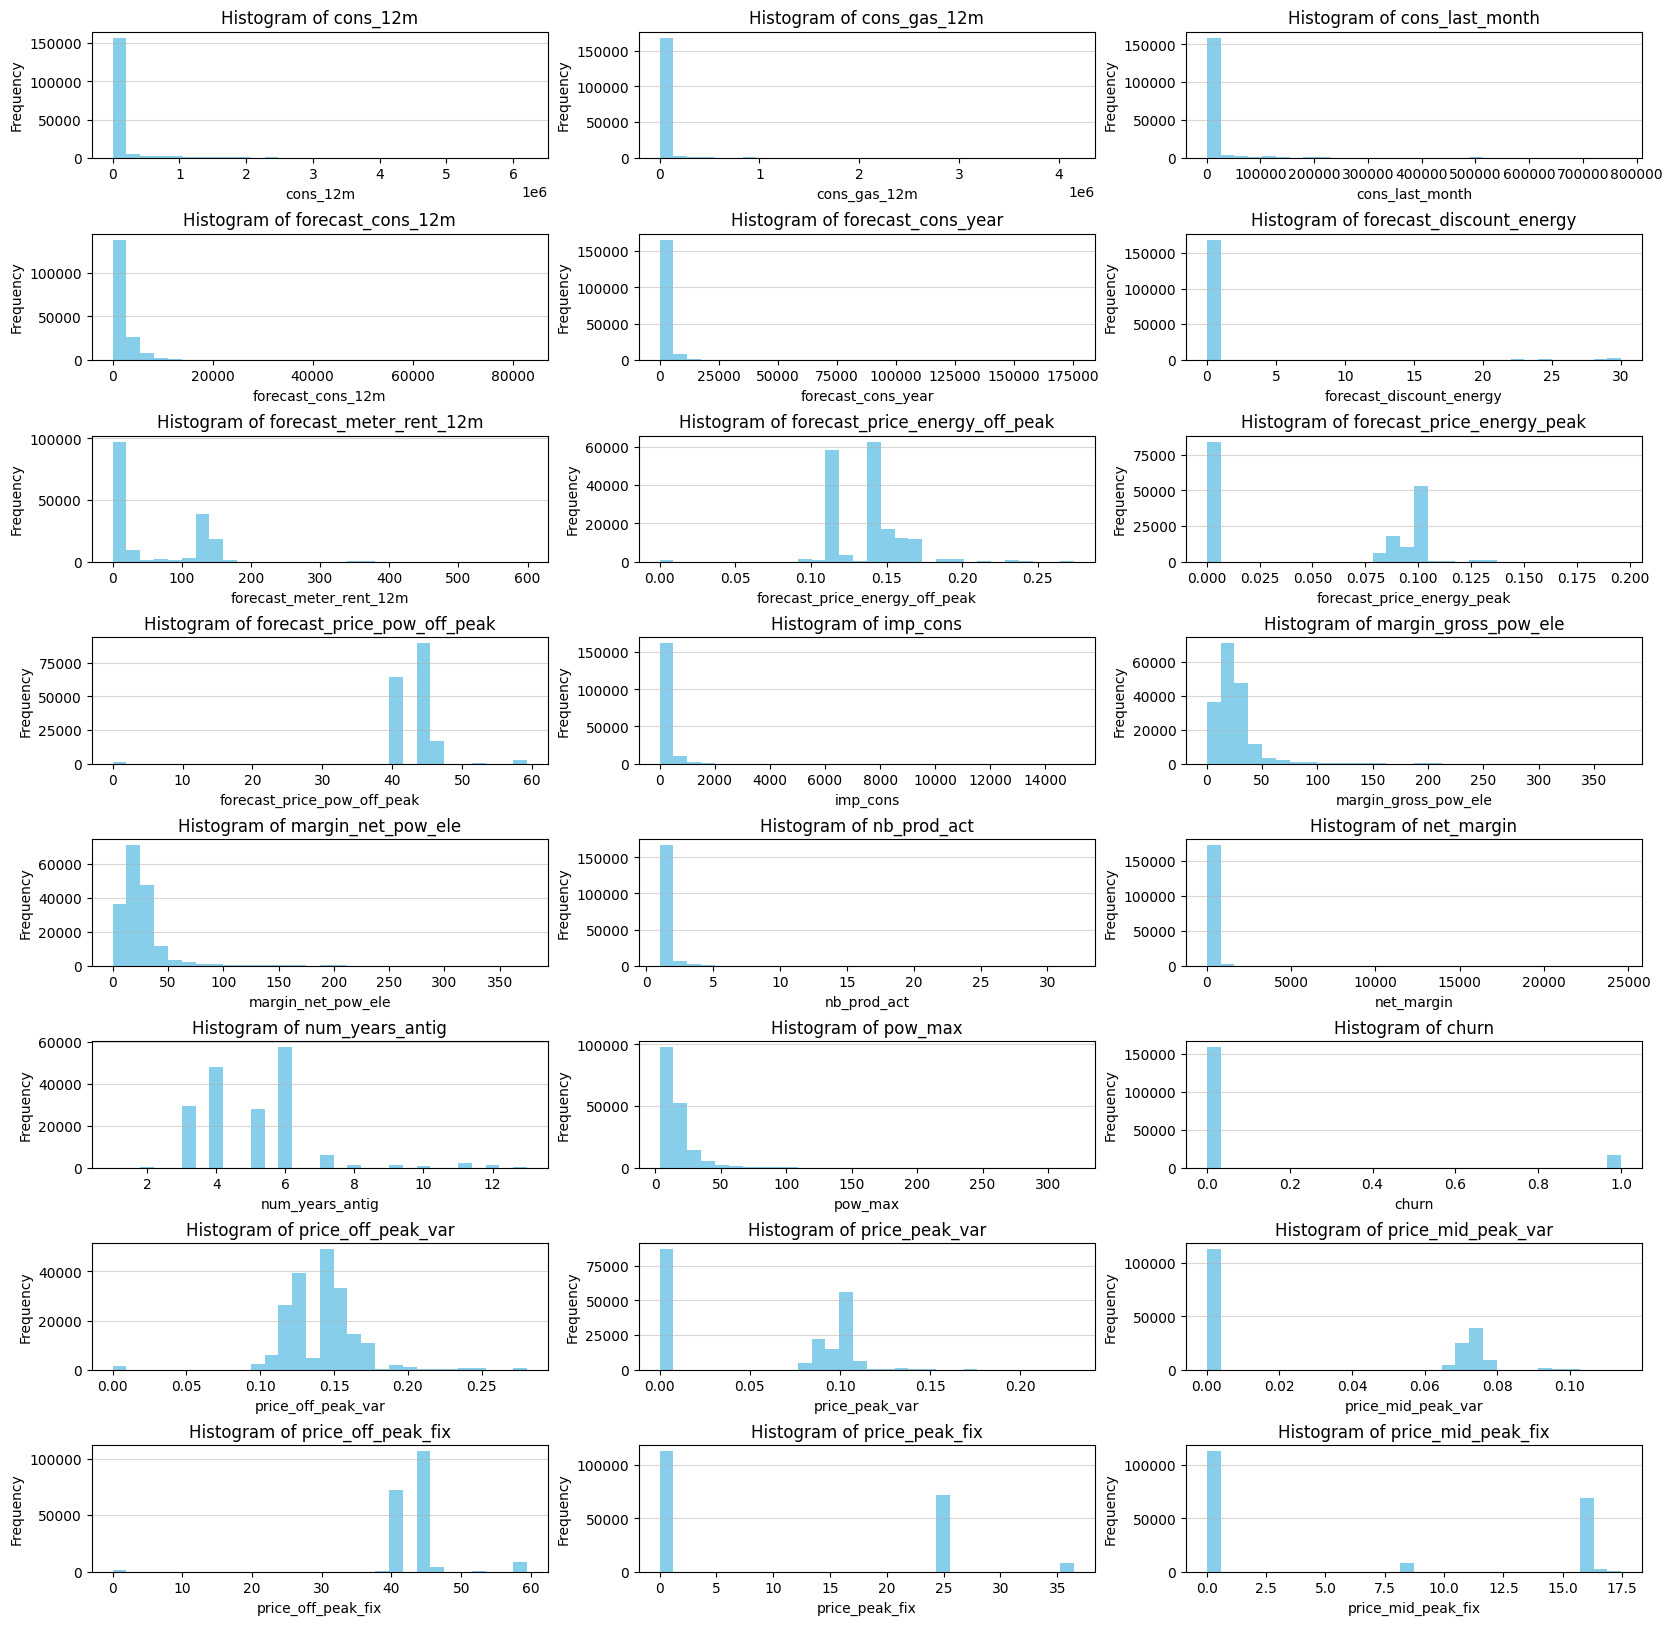

In [18]:
# Import Matplotlib, Seaborn, and PrettyTable from prettytable for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

# Create histogram subplots for each numeric column
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(20, 20))
fig.subplots_adjust(hspace=0.6)

axes = axes.flatten()

# Iterate over each column in the skewkurt DataFrame
for i, column in enumerate(skewkurt.index):
    ax = axes[i]
    ax.hist(data[column], bins=30, color='skyblue')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.5)

for i in range(len(skewkurt.index), len(axes)):
    fig.delaxes(axes[i])

plt.show()

**Insight :**

From the provided data, we can observe the tendencies in the distribution and potential outliers in the dataset columns:

1. **Normal Distribution:**
   - No columns exhibit a clear normal distribution based on the provided values. However, a few columns might indicate tendencies towards a normal distribution due to their relatively lower values, such as 'forecast_meter_rent_12m' and 'num_years_antig'.

2. **Potential Outliers:**
   - Some columns display characteristics that suggest potential outliers or non-normal distribution trends. These columns include 'net_margin', 'forecast_cons_year', 'imp_cons', 'nb_prod_act', 'cons_gas_12m', 'pow_max', and 'cons_12m'. These columns have higher values, implying the presence of outliers or non-normal distribution patterns.

Columns showing tendencies toward non-normal distributions might require further analysis to understand the nature of the outliers or the distribution shape. Further exploration through visualization techniques like box plots or outliers percentage calculations could assist in identifying outliers and gaining a deeper understanding of the data distribution.

**4.7 Outliers Identification and Analysis**

C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_base.py:1606: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\Fariskoms\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Py

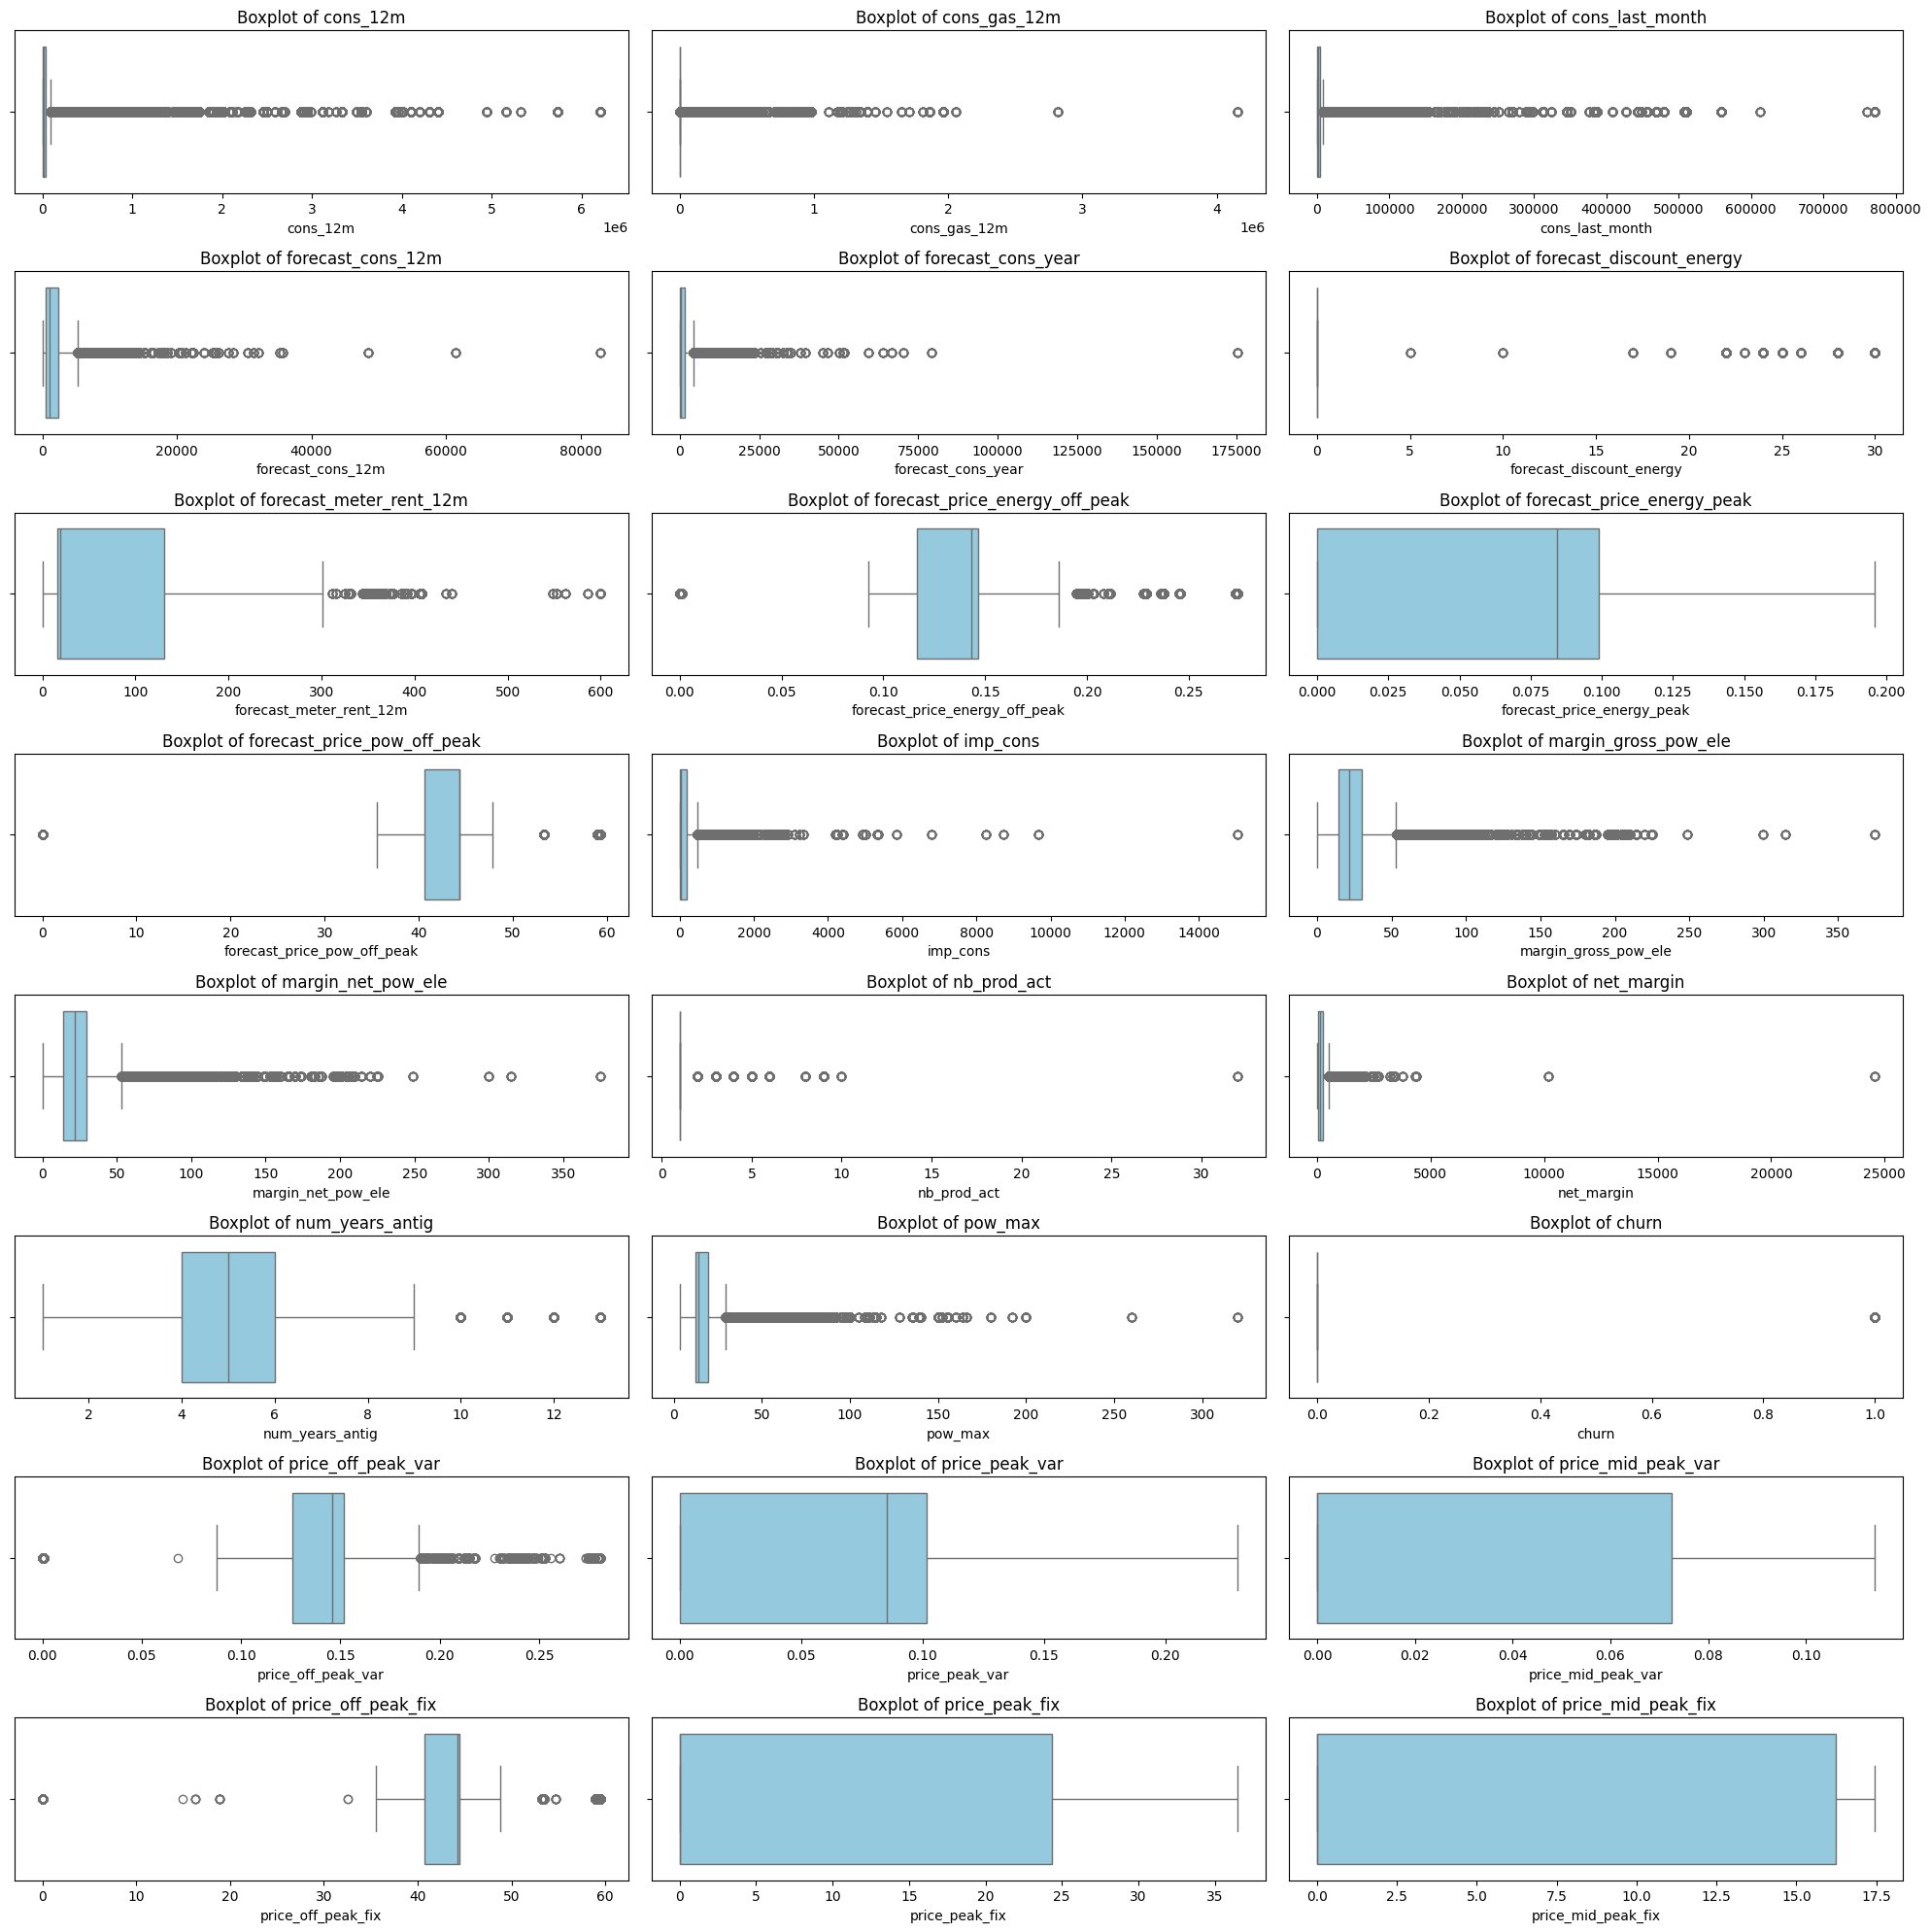

Outliers Percentage:
+--------------------------------+-------------+-------------+
| Attribute                      | Lower Bound | Upper Bound |
+--------------------------------+-------------+-------------+
| cons_12m                       |    0.00%    |    12.95%   |
| cons_gas_12m                   |    0.00%    |    16.23%   |
| cons_last_month                |    0.00%    |    12.75%   |
| forecast_cons_12m              |    0.00%    |    6.55%    |
| forecast_cons_year             |    0.00%    |    8.09%    |
| forecast_discount_energy       |    0.00%    |    3.18%    |
| forecast_meter_rent_12m        |    0.00%    |    0.94%    |
| forecast_price_energy_off_peak |    0.58%    |    1.72%    |
| forecast_price_energy_peak     |    0.00%    |    0.00%    |
| forecast_price_pow_off_peak    |    0.58%    |    1.56%    |
| imp_cons                       |    0.00%    |    7.55%    |
| margin_gross_pow_ele           |    0.00%    |    4.10%    |
| margin_net_pow_ele             |

In [19]:
n_subplot = 3  # Set the number of plots in a row
n_baris = len(numeric_features) // n_subplot + 1  # Calculate the number of rows

# Define the number of images to be displayed
num_images = n_baris // 24 + 1

# Set the image size
plt.figure(figsize=(20, 20))

# Loop to display boxplots
for index, attributes in enumerate(numeric_features):
    if index < 24:  # Ensure no 11th subplot
        plt.subplot(8, 3, index + 1)
        sns.boxplot(x=data[attributes], color='skyblue', orient='v')
        plt.title(f'Boxplot of {attributes}')
        plt.ylabel('')

plt.tight_layout()
plt.show()

# Create an empty list to store the percentage of outliers
results = []

# Define the threshold to define outliers
outlier_threshold = 1.5

# Initialize dictionary to store the percentage of outliers
outliers_percentage = {}

# Calculate the IQR (Interquartile Range) values and outliers
for attribute in numeric_features:
    Q1 = data[attribute].quantile(0.25)
    Q3 = data[attribute].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

    # Identify outliers
    outliers_lower = data[data[attribute] < lower_bound]
    outliers_upper = data[data[attribute] > upper_bound]

    # Calculate percentage of lower bound outliers
    percentage_lower = len(outliers_lower) / len(data) * 100

    # Calculate percentage of upper bound outliers
    percentage_upper = len(outliers_upper) / len(data) * 100

    # Append results to the list
    results.append([attribute, f"{percentage_lower:.2f}%", f"{percentage_upper:.2f}%"])

# Create a table using PrettyTable
table = PrettyTable(["Attribute", "Lower Bound", "Upper Bound"])

# Insert data into the "Outliers Percentage" table
for result in results:
    table.add_row(result)

# Set column alignment
table.align["Attribute"] = "l"
table.align["Lower Bound"] = "c"
table.align["Upper Bound"] = "c"

# Print the table
print("Outliers Percentage:")
print(table)

**Insight :**

The provided data gives insight into the identification of outliers, indicating the lower and upper bounds for various attributes within the dataset. Here's the analysis based on the obtained data:

1. **Cons_12m, Cons_gas_12m, Cons_last_month, Forecast_cons_12m, Forecast_cons_year, Imp_cons, Net_margin, Pow_max, and Churn**:
   - These attributes exhibit a significant percentage of potential outliers, ranging from approximately 6% to about 16%. These outliers may significantly impact the analysis, suggesting a non-normal distribution in these columns.

2. **Nb_prod_act**:
   - This attribute has a notably high percentage of potential outliers, around 19.72%. It indicates a substantial number of outliers that could influence any analysis involving this attribute.

3. **Forecast_discount_energy, Forecast_meter_rent_12m, Margin_gross_pow_ele, Margin_net_pow_ele, Num_years_antig, Price_off_peak_var, Price_off_peak_fix**:
   - These attributes have a lower percentage of potential outliers, ranging between approximately 0.94% to 4.10%. While the percentages are lower compared to the aforementioned attributes, the presence of outliers might still impact the data analysis.

4. **Forecast_price_energy_off_peak, Forecast_price_pow_off_peak, Price_peak_var, Price_mid_peak_var, Price_peak_fix, Price_mid_peak_fix**:
   - Some of these attributes have minimal or no outliers, which might suggest a more standardized or constrained range of values.

Overall, a higher percentage of outliers in certain attributes (like 'cons_12m', 'cons_gas_12m', 'nb_prod_act') indicates the presence of data points that differ significantly from the majority. Analyzing and addressing these outliers may be crucial for maintaining the integrity of statistical analyses or machine learning models built upon this dataset. Further exploration through visualization and statistical methods can help to better understand and handle these outliers appropriately.

**4.8 Features Correlations Analysis**

In this section, an analysis of the correlation between features in the dataset will be conducted using the Phik matrix. Phik correlation is chosen due to its ability to handle outliers and, notably, its excellence in comparing correlations between numerical and categorical features. Phik correlation possesses several advantages, including:

- **Handling both categorical and numerical data:** Phik correlation allows the simultaneous use of categorical and numerical data in the correlation matrix. This is particularly beneficial in this project, which comprises a mix of categorical and numerical features, enabling a comprehensive analysis of the entire dataset.
  
- **Invariance to permutations and sorting:** Phik correlation remains unaffected by permutations or changes in the order of feature values, ensuring consistent correlation results irrespective of data reordering or alterations.
  
- **Ability to handle outliers:** The Phik correlation method tends to be more robust against outliers when compared to other parametric correlations. This attribute makes it suitable for use in projects dealing with outliers, as it still provides relevant insights into the relationships between features despite the presence of extreme values in the dataset.

In [23]:
data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [28]:
data_ = data.sample(1000)
data_

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
75746,9e4ee2178beb5a3fd6421011377b80b9,MISSING,4619.0,0.0,1286.0,2011-05-03,2016-05-03,2015-04-14,2015-05-04,443.24,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0.0,2015-05-01,0.150225,0.000000,0.000000,44.444710,0.000000,0.000000
163361,1db7cf4e4116b0fdc64037a8e3c2828d,foosdfpfkusacimwkcsosbicdxkicaua,11930.0,0.0,836.0,2013-02-01,2016-02-01,2013-02-01,2015-02-02,463.30,...,ldkssxwpmemidmecebumciepifcamkci,13.856,0.0,2015-11-01,0.147983,0.000000,0.000000,44.266930,0.000000,0.000000
118773,1c5272aa16c0ffddbe0c9b5e66b79161,usilxuppasemubllopkaafesmlibmsdf,6144.0,163452.0,543.0,2012-05-25,2016-05-25,2014-04-15,2015-06-01,921.65,...,lxidpiddsbxsbosboudacockeimpuepw,13.700,0.0,2015-04-01,0.151966,0.000000,0.000000,44.444710,0.000000,0.000000
156619,624b0339bc17c23eb074de76f0f01a1b,foosdfpfkusacimwkcsosbicdxkicaua,22992.0,0.0,1857.0,2012-10-16,2016-10-16,2015-08-27,2015-10-18,821.24,...,lxidpiddsbxsbosboudacockeimpuepw,10.390,0.0,2015-08-01,0.144524,0.000000,0.000000,44.444710,0.000000,0.000000
33243,9c4a64254bb29707b02578a67e252b63,foosdfpfkusacimwkcsosbicdxkicaua,34991.0,0.0,763.0,2012-09-08,2016-10-07,2015-08-26,2015-10-09,112.85,...,lxidpiddsbxsbosboudacockeimpuepw,10.390,0.0,2015-09-01,0.143306,0.000000,0.000000,44.444710,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189995,e0adcca7a890d0cccb8788613b860022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2015-03-01,0.123086,0.100505,0.068646,40.565969,24.339581,16.226389
33824,e4e183646f7fd7ab5875eab449541aa4,ewpakwlliwisiwduibdlfmalxowmwpci,6189.0,2642.0,540.0,2010-02-26,2016-02-26,2015-12-17,2015-02-27,643.45,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0.0,2015-02-01,0.168705,0.084119,0.000000,44.266931,0.000000,0.000000
71687,0a86bc8b8cd128c3dafa8902e251bf6b,MISSING,8341.0,268.0,1416.0,2009-09-04,2016-09-04,2015-07-11,2015-09-05,1190.88,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0.0,2015-10-01,0.143306,0.000000,0.000000,44.444710,0.000000,0.000000
184378,afdcb4b889b3961077611f279664f2af,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2015-05-01,0.107070,0.094231,0.068053,58.936774,36.344726,8.334260


In [29]:
import phik  # Importing phik for analyzing correlation of categorical data
from phik import phik_matrix  # To compute Phi K correlation matrix
from phik.report import plot_correlation_matrix  # To create visualization of correlation matrix
from phik import report  # To provide reporting and additional analysis to explore relationships between variables in the dataset.

# Defining list features
attributes = ['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix']


# Determining interval columns for phik matrix calculation
interval_cols = ['Weekly_Sales']

# Calculating the phik matrix for analyzing feature correlations
phik_overview = data_[attributes].phik_matrix(interval_cols=interval_cols)

# Function to categorize correlation
def categorize_correlation(phik_overview):
    if  phik_overview > 0.5:
        return 'High_Positive_Correlation'
    elif phik_overview > 0.1:
        return 'Moderate_Positive_Correlation'
    elif phik_overview > 0:
        return 'Low_Positive_Correlation'
    elif phik_overview < -0.5:
        return 'High_Negative_Correlation'
    elif phik_overview < -0.1:
        return 'Moderate_Negative_Correlation'
    else:
        return 'Low_Negative_Correlation'
    
# DataFrame for categorical correlations
correlation_df = phik_overview.applymap(categorize_correlation)
correlation_df


C:\Users\Fariskoms\AppData\Local\Temp\ipykernel_9988\1971360558.py:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  correlation_df = phik_overview.applymap(categorize_correlation)


,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
id,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,...,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation
channel_sales,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Moderate_Positive_Correlation,Low_Negative_Correlation,High_Positive_Correlation,Moderate_Positive_Correlation,High_Positive_Correlation,Moderate_Positive_Correlation,High_Positive_Correlation,...,Moderate_Positive_Correlation,Moderate_Positive_Correlation,Low_Positive_Correlation,Low_Positive_Correlation,Moderate_Positive_Correlation,Moderate_Positive_Correlation,Low_Positive_Correlation,Moderate_Positive_Correlation,Low_Negative_Correlation,Low_Negative_Correlation
cons_12m,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,...,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,High_Positive_Correlation,Low_Negative_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation
cons_gas_12m,High_Positive_Correlation,Moderate_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,...,Moderate_Positive_Correlation,High_Positive_Correlation,Moderate_Positive_Correlation,Moderate_Positive_Correlation,Low_Negative_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,High_Positive_Correlation,High_Positive_Correlation
cons_last_month,High_Positive_Correlation,Low_Negative_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,...,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Low_Negative_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation
date_activ,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,...,High_Positive_Correlation,High_Positive_Correlation,Moderate_Positive_Correlation,Low_Negative_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation
date_end,High_Positive_Correlation,Moderate_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,...,Low_Negative_Correlation,High_Positive_Correlation,Moderate_Positive_Correlation,Low_Negative_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation

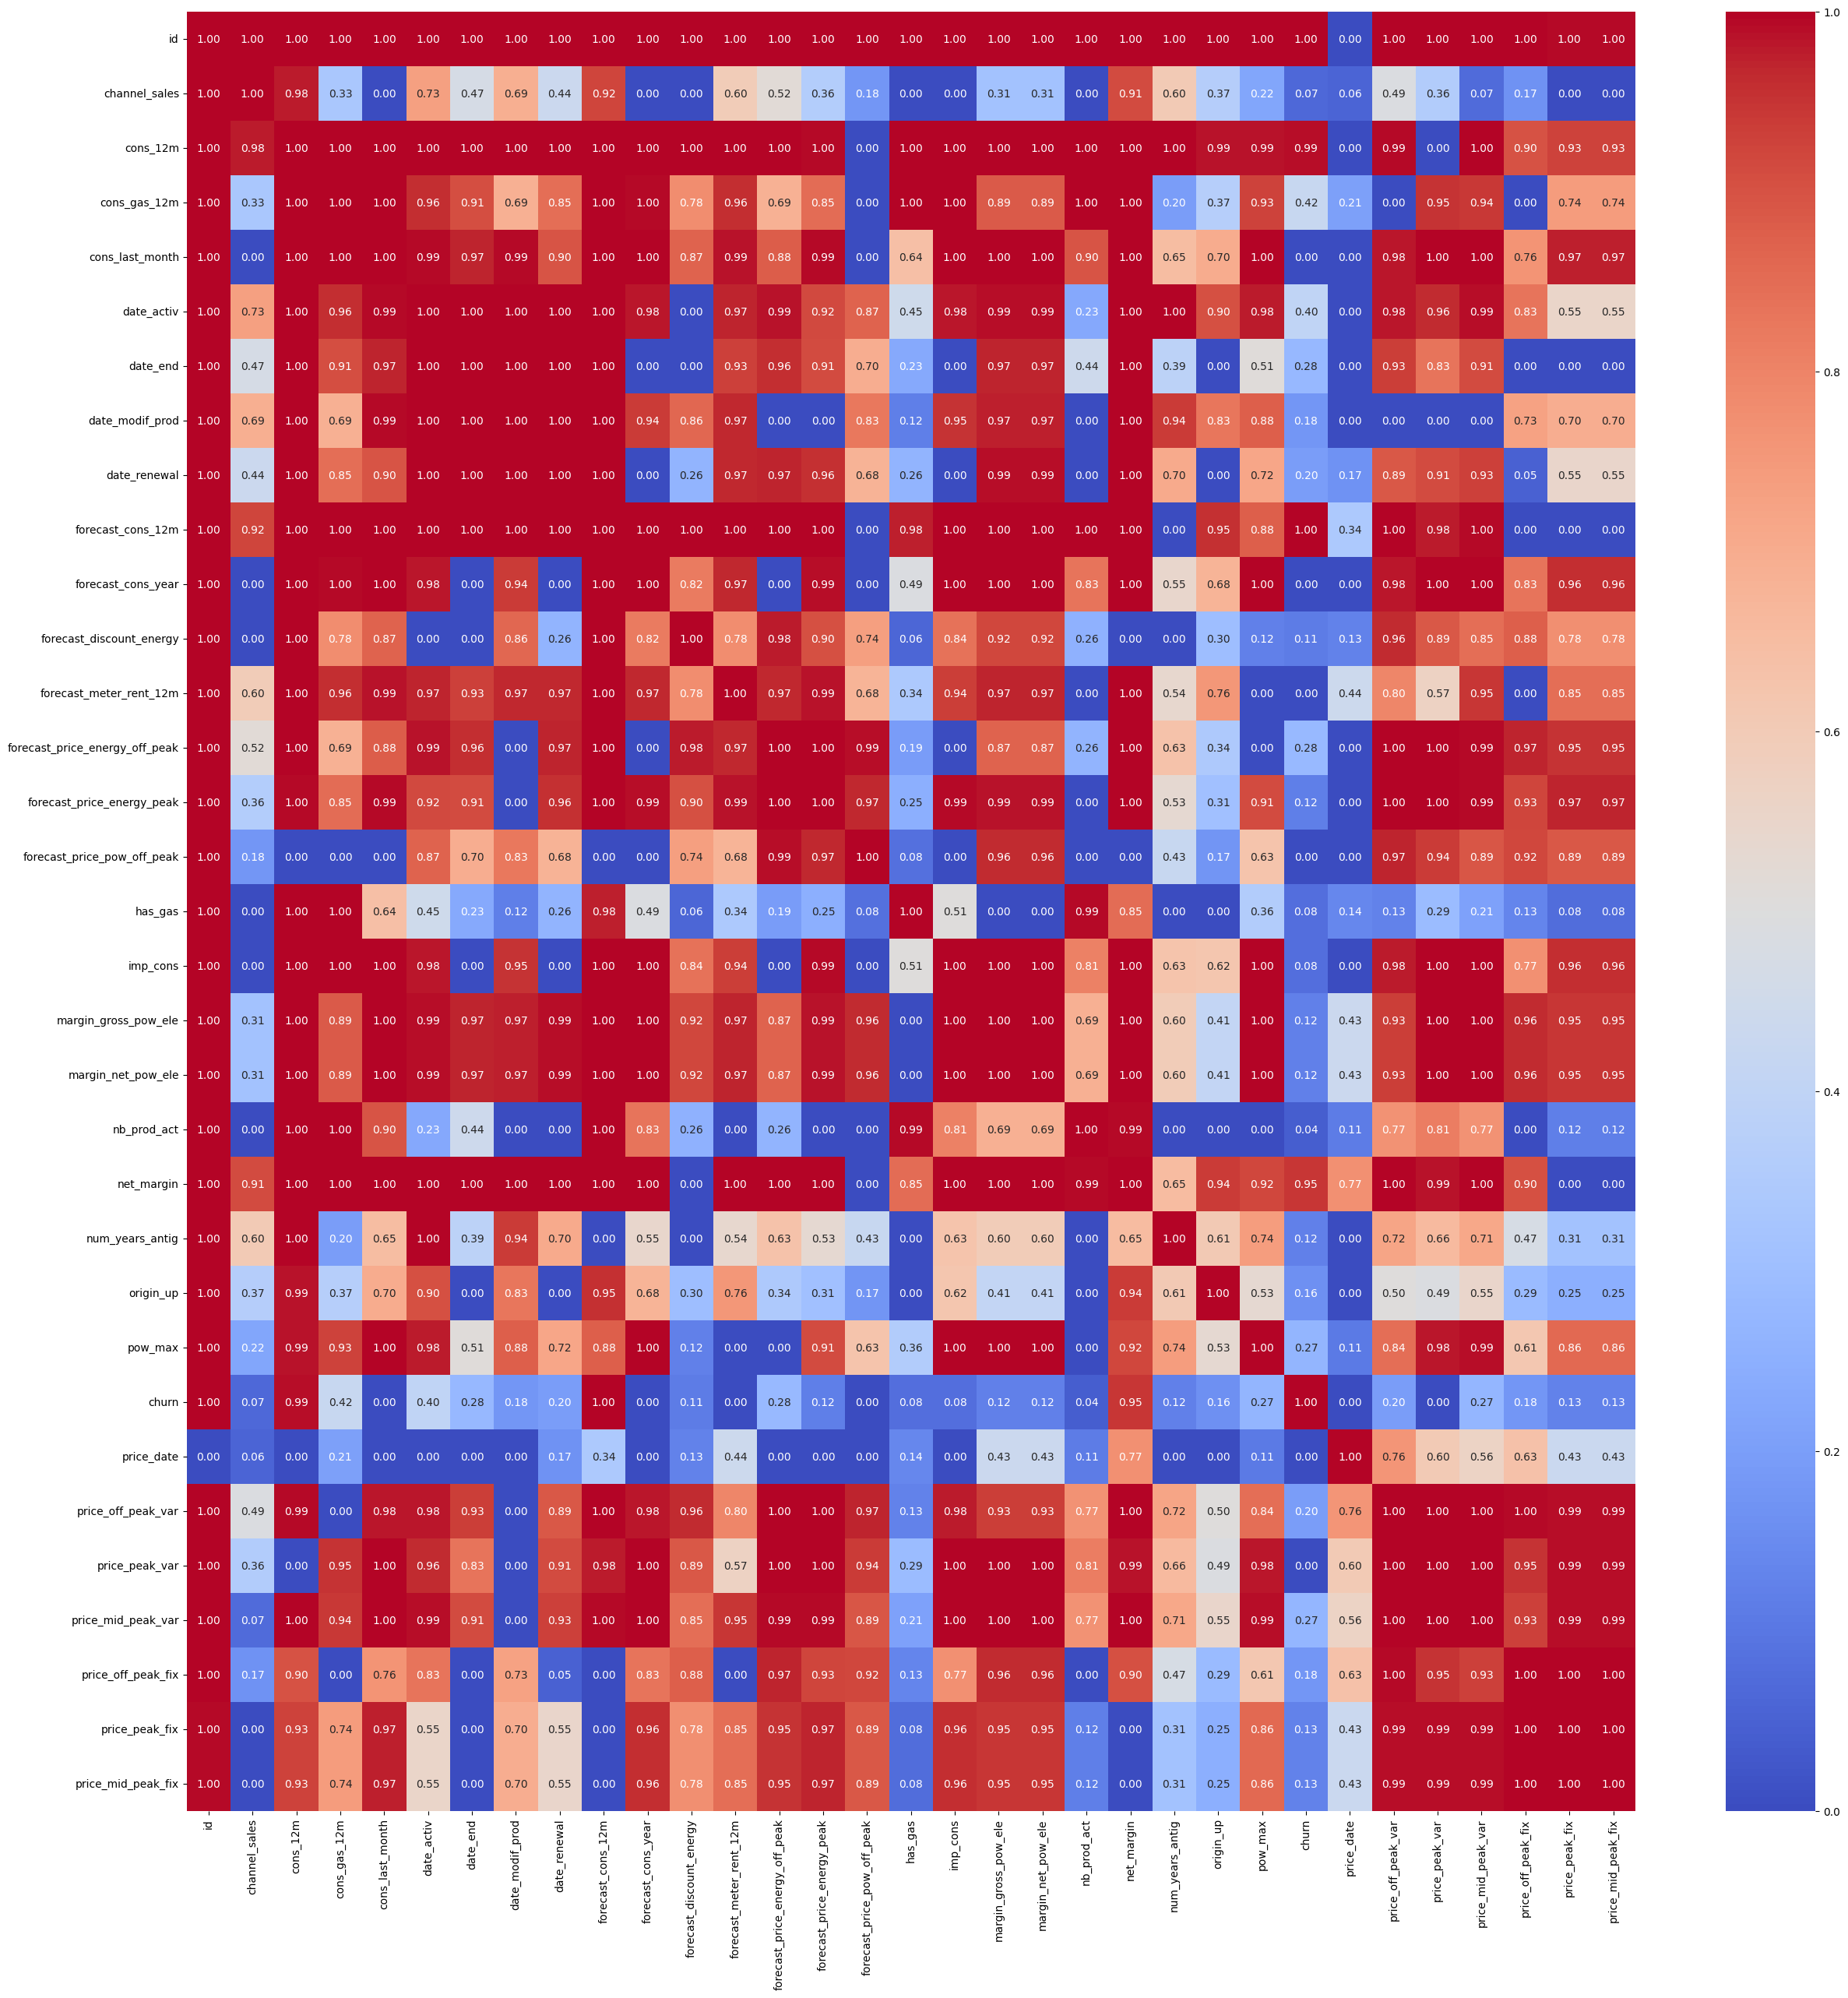

In [31]:
# Creating a heatmap with correlation number annotation
plt.figure(figsize=(30, 30))
sns.heatmap(phik_overview, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Displaying the heatmap
plt.show()

In [8]:
data.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],
      dtype='object')

In [9]:
print(len(data.columns))

33


**Insights :**

Several features that exhibit significant correlations towards churn are :
- 'id','cons_12m','cons_gas_12m','date_activ','forecast_price_energy_off_peak','net_margin','pow_max', 'price_off_peak_var','price_mid_peak_var'.

These features will then be grouped in a new variable "significant_features" and we will observe more further how these features correlates with churn using scatter plot.


In [10]:
significant_features = ['cons_12m','cons_gas_12m','date_activ','forecast_price_energy_off_peak','net_margin','pow_max', 'price_off_peak_var','price_mid_peak_var']
print(len(significant_features))

9


**4.9 Customer's Churn Analysis**

*In this section, we will investigate the percentage of customers churn compared to customers retention*

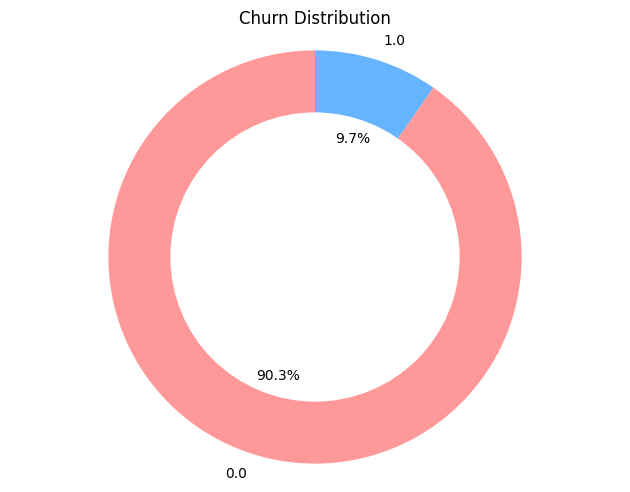

In [13]:
# Count the values in the 'churn' column
churn_counts = data['churn'].value_counts()

# Calculate percentages
percentages = churn_counts / churn_counts.sum() * 100

# Create a pie chart
labels = churn_counts.index
sizes = churn_counts.values
colors = ['#ff9999', '#66b3ff']  # You can change colors here

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Draw a circle to make it a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')
plt.tight_layout()

# Set title
plt.title('Churn Distribution')

# Show the plot
plt.show()

**Insights :**

The provided insights offer two main conclusions based on the given data:

1. **Churning Customers Minority:** The analysis indicates that the number of churning customers is relatively low compared to the total customer base. Specifically, approximately 90.3% of customers are not churning, while the remaining percentage constitutes the churning customer segment. This suggests that churned customers represent a minority within the dataset.

2. **Analyzing Correlations:** The next step involves exploring the correlations between churning rates and significant features present in the dataset. This analysis aims to identify any relationships or patterns between the churning behavior of customers and various factors/features provided in the data. Understanding these correlations could help uncover influential factors contributing to customer churn.

In [14]:
significant_features

['id',
 'cons_12m',
 'cons_gas_12m',
 'date_activ',
 'forecast_price_energy_off_peak',
 'net_margin',
 'pow_max',
 'price_off_peak_var',
 'price_mid_peak_var']

**Analysis of Consumption towards Churn**

In [16]:
consumption = ['cons_12m','cons_gas_12m']

In [17]:
# Filter data for churned and non-churned customers
churned = data[data['churn'] == 1]
not_churned = data[data['churn'] == 0]

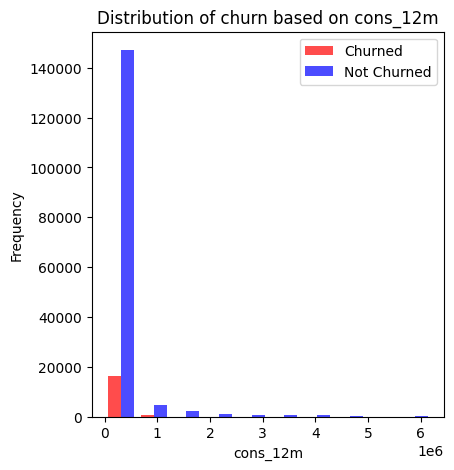

In [18]:
# Plotting for 'cons_12m'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist([churned['cons_12m'], not_churned['cons_12m']], color=['red', 'blue'], label=['Churned', 'Not Churned'], alpha=0.7)
plt.xlabel('cons_12m')
plt.ylabel('Frequency')
plt.title('Distribution of churn based on cons_12m')
plt.legend()


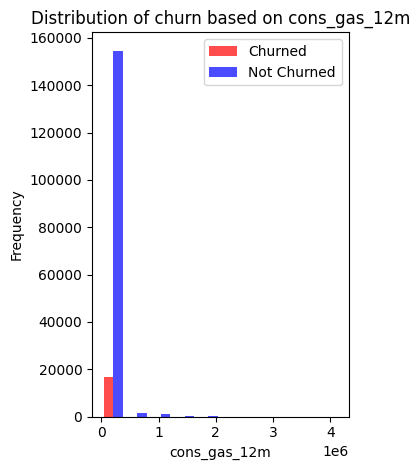

In [19]:
# Plotting for 'cons_gas_12m'
plt.subplot(1, 2, 2)
plt.hist([churned['cons_gas_12m'], not_churned['cons_gas_12m']], color=['red', 'blue'], label=['Churned', 'Not Churned'], alpha=0.7)
plt.xlabel('cons_gas_12m')
plt.ylabel('Frequency')
plt.title('Distribution of churn based on cons_gas_12m')
plt.legend()

plt.tight_layout()
plt.show()

**Insights :** 

The insights drawn from the bar plots indicate a correlation between lower consumption in the past 12 months and a higher likelihood of churn among customers. This observation highlights the following points:

- **Consumption and Churn Relationship:** There appears to be a notable relationship between lower consumption levels in the previous 12 months and the probability of churn. Customers with lower consumption seem to exhibit a higher tendency to churn compared to those with higher consumption levels.

- **Potential Churn Indicators:** The data suggests that consumption patterns over the previous year might serve as an indicator or predictor of potential churn. This finding could be vital for customer retention strategies, allowing businesses to focus on identifying and addressing issues related to low consumption to reduce churn rates.

Understanding the reasons behind lower consumption among customers who churn could provide actionable insights for businesses. 

**Analysis of Date Activ towards Churn**

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              193002 non-null  object 
 1   channel_sales                   175149 non-null  object 
 2   cons_12m                        175149 non-null  float64
 3   cons_gas_12m                    175149 non-null  float64
 4   cons_last_month                 175149 non-null  float64
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  float64
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

In [33]:
# Creating a new temporary dataframe copied from the original dataframe
data_ = data.copy()

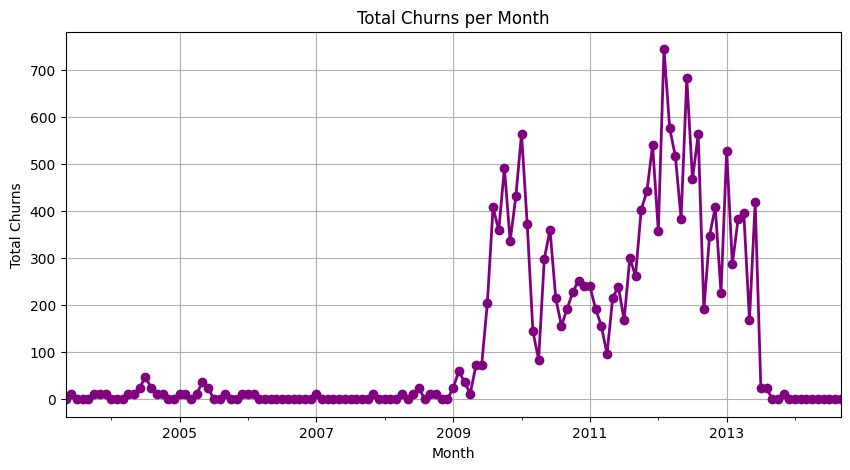

In [34]:
# Convert the 'date_activ' column to datetime data type
data_['date_activ'] = pd.to_datetime(data['date_activ'])

# Set the 'date_activ' column as the DataFrame index
data_.set_index('date_activ', inplace=True)

# Resample the data by month and calculate total churn count per month
churn_per_month = data_['churn'].resample('M').sum()

# Plot the monthly churn data
plt.figure(figsize=(10, 5))
churn_per_month.plot(kind='line', color='purple', marker='o', linestyle='-', linewidth=2)
plt.title('Total Churns per Month')
plt.xlabel('Month')
plt.ylabel('Total Churns')
plt.grid(True)
plt.show()

**Insights :**

The insights derived from the provided information highlight a surge in customer churn during the early part of 2012, followed by a declining trend from 2013 onwards. This observation suggests the following:

1. **Churn Peak in Early 2012:** There was a substantial increase in churn during the initial phase of 2012. Investigating the reasons behind this surge could provide valuable insights. Possible factors contributing to this spike might include changes in services, pricing, market conditions, or customer satisfaction issues during that time.

2. **Annual Increase in Churning Customers:** Additionally, there appears to be a recurring pattern of increased churning at the beginning of each year. This periodic increase might indicate seasonal or annual effects caused by various factors like new year promotions, contract expirations, or shifts in customer behaviors due to seasonal changes.

Further investigation and analysis into the specific events, policies, or changes implemented around the start of 2012 could help understand the significant surge in churn at that time. 

**Analysis of forecast_price_energy_off_peak towards churn**

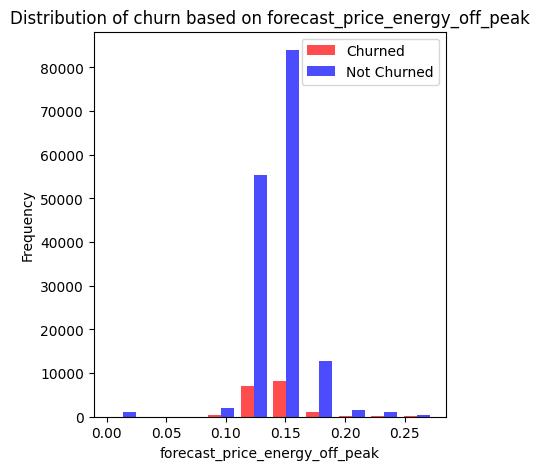

In [36]:
# Plotting for 'cons_12m'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist([churned['forecast_price_energy_off_peak'], not_churned['forecast_price_energy_off_peak']], color=['red', 'blue'], label=['Churned', 'Not Churned'], alpha=0.7)
plt.xlabel('forecast_price_energy_off_peak')
plt.ylabel('Frequency')
plt.title('Distribution of churn based on forecast_price_energy_off_peak')
plt.legend()

**Insights :**

The provided information suggests a relationship between forecasted energy prices for the first period (specifically off-peak) and customer churn. Here's a breakdown of the insight:

- **Slight Trend Towards Churn:** The forecasted energy price for the initial period (off-peak) shows a subtle trend in relation to churn. This could imply that certain ranges of off-peak energy prices might influence or contribute to customer churn, although the effect might be relatively minimal within this range.

- **Significant Increment in Moderate Price Range:** Within a specific range (between 0.10 to 0.15), the moderate forecasted energy prices for the initial period exhibit a notable increase in churn rates. This range seems to have a more considerable impact on customer churn compared to other price ranges.

- **Declining Churn Beyond 0.15 to 0.25:** Conversely, as the forecasted energy prices move past the 0.15 range and continue rising until they reach the highest values (0.25), the churn rates decline. This suggests that extremely high energy prices (between 0.15 to 0.25) have a decreasing effect on customer churn.

**Analysis of net_margin towards churn**

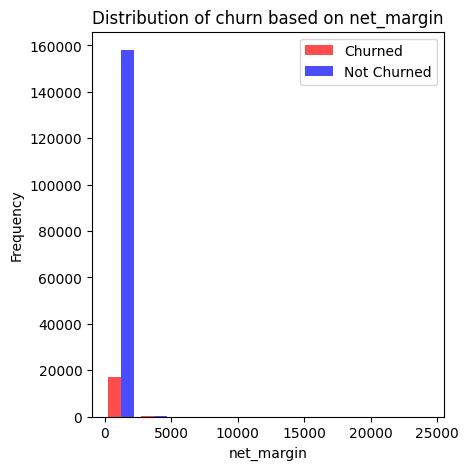

In [37]:
# Plotting for 'cons_12m'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist([churned['net_margin'], not_churned['net_margin']], color=['red', 'blue'], label=['Churned', 'Not Churned'], alpha=0.7)
plt.xlabel('net_margin')
plt.ylabel('Frequency')
plt.title('Distribution of churn based on net_margin')
plt.legend()

**Insights :**

The barplot highlighting the distribution of churn concerning net margin presents a compelling story. It becomes evident that a majority of customers are concentrated within a net margin range of 0 to 2500. Strikingly, the churn rate appears notably higher precisely within the smaller net margin bands. This observation underscores a correlation where churning customers are predominantly associated with lower net margins, suggesting a critical relationship between net margin values and customer churn.

**Analysis of pow_max towards churn**

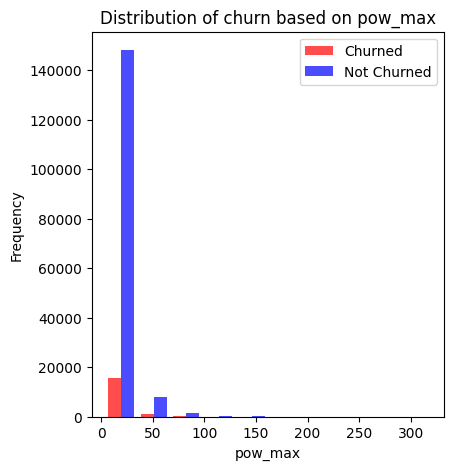

In [43]:
# Plotting for 'cons_12m'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist([churned['pow_max'], not_churned['pow_max']], color=['red', 'blue'], label=['Churned', 'Not Churned'], alpha=0.7)
plt.xlabel('pow_max')
plt.ylabel('Frequency')
plt.title('Distribution of churn based on pow_max')
plt.legend()

**Insights :**

Exploring the correlation between subscribe power and customer churn revealed a noteworthy trend. Although the observed churn rates among customers with lower subscribe power remain relatively insignificant, there is a discernible inclination towards higher churn rates in this segment. This observation emphasizes a potential relationship between lower subscribe power and an increased propensity for customer churn.

**Analysis of Price towards Churn**

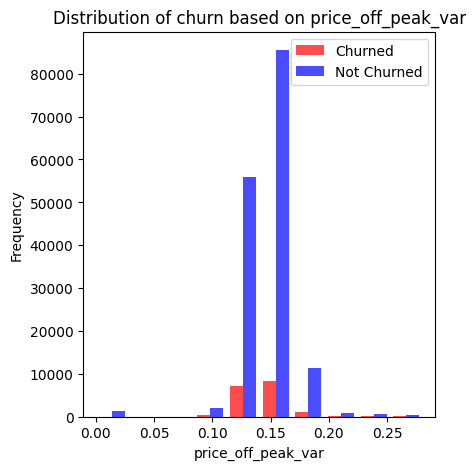

In [44]:
# Plotting for 'cons_12m'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist([churned['price_off_peak_var'], not_churned['price_off_peak_var']], color=['red', 'blue'], label=['Churned', 'Not Churned'], alpha=0.7)
plt.xlabel('price_off_peak_var')
plt.ylabel('Frequency')
plt.title('Distribution of churn based on price_off_peak_var')
plt.legend()

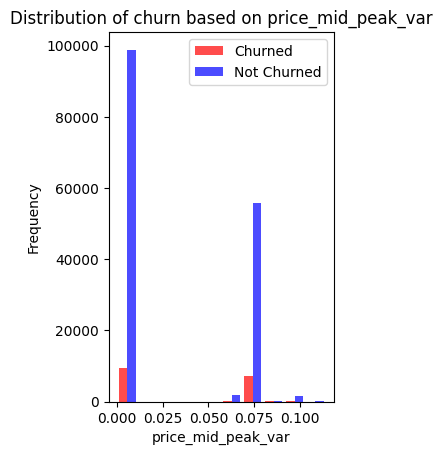

In [45]:
plt.subplot(1, 2, 1)
plt.hist([churned['price_mid_peak_var'], not_churned['price_mid_peak_var']], color=['red', 'blue'], label=['Churned', 'Not Churned'], alpha=0.7)
plt.xlabel('price_mid_peak_var')
plt.ylabel('Frequency')
plt.title('Distribution of churn based on price_mid_peak_var')
plt.legend()

**Insight:**

- **price_off_peak_var:** Analysis indicates a correlation between the price of energy during the 1st period (off-peak) and churn rates. Notably, a substantial increase in churn rates is observed within the price range of 0.10 to 0.18, peaking notably at 0.15.
- **price_mid_peak_var:** While no discernible trend is evident between the price of energy for the 3rd period (mid-peak) and churn, noteworthy observations reveal significantly higher churn rates occurring at prices ranging between 0.0001-0.0009 and 0.075.

**Conclusions from Exploratory Data Analysis (EDA)**

1. **Churn Distribution:** The analysis reveals that churning customers represent a minority within the dataset, constituting approximately 9.7% of the total customer base. This highlights that the majority, around 90.3%, are non-churning customers.

2. **Significant Correlations:** Certain features showcase notable correlations with churn. These include 
    - 'id'
    - 'cons_12m'
    - 'cons_gas_12m'
    - 'date_activ'
    - 'forecast_price_energy_off_peak'
    - 'net_margin'
    - 'pow_max'
    - 'price_off_peak_var'
    - 'price_mid_peak_var'.

3. **Price Sensitivity Impact:** While 'price_off_peak_var' and 'price_mid_peak_var' display relatively stronger correlations with churn compared to other features, the overall influence of price sensitivity factors on churn remains somewhat limited.

4. **Data Distribution:** A significant proportion of features in the dataset exhibit skewed distributions, indicating the possible presence of outliers.

5. **Further Investigation:** To better understand customer churn, additional factors such as customer satisfaction, service quality, engagement levels, market price competition, and detailed pricing information might be necessary. Exploring these aspects could enhance the predictive accuracy of churn analysis and reveal deeper insights into customer behavior.

In [6]:
data.to_csv('data_after_EDA.csv',index=False)